In [14]:
import qiskit
from qiskit.quantum_info import Operator
from qiskit_experiments.framework import ParallelExperiment
from qiskit_experiments.library import StateTomography
import matplotlib.pyplot as plt


In [6]:
from qiskit_aer import AerSimulator
from qiskit.providers.fake_provider import FakePerth

backend = AerSimulator.from_backend(FakePerth())

In [21]:
import qiskit
from qiskit_experiments.framework import ParallelExperiment
from qiskit_experiments.library import StateTomography
import numpy as np 

angle = np.linspace(0,4*np.pi,25)
density_matrices, state_vectors = [], []
for theta in angle:
    qc = qiskit.QuantumCircuit(1)
    qc.ry(theta, 0)
    # qc.s(0)

    # QST Experiment
    qstexp1 = StateTomography(qc)
    qstdata1 = qstexp1.run(backend, seed_simulation=100).block_for_results()
    state_result = qstdata1.analysis_results("state")

    density_matrices.append(state_result.value.data)
    state_vectors.append(Operator(qc).data @ np.array([1,0])) 
state_vectors = np.array(state_vectors)
density_matrices = np.array(density_matrices)

In [18]:
state_vectors

array([[-0.70710678+0.j,  0.70710678+0.j],
       [-0.70710678+0.j,  0.70710678+0.j],
       [-0.70710678+0.j,  0.70710678+0.j],
       [-0.70710678+0.j,  0.70710678+0.j],
       [-0.70710678+0.j,  0.70710678+0.j],
       [-0.70710678+0.j,  0.70710678+0.j],
       [-0.70710678+0.j,  0.70710678+0.j],
       [-0.70710678+0.j,  0.70710678+0.j],
       [-0.70710678+0.j,  0.70710678+0.j],
       [-0.70710678+0.j,  0.70710678+0.j],
       [-0.70710678+0.j,  0.70710678+0.j],
       [-0.70710678+0.j,  0.70710678+0.j],
       [-0.70710678+0.j,  0.70710678+0.j],
       [-0.70710678+0.j,  0.70710678+0.j],
       [-0.70710678+0.j,  0.70710678+0.j],
       [-0.70710678+0.j,  0.70710678+0.j],
       [-0.70710678+0.j,  0.70710678+0.j],
       [-0.70710678+0.j,  0.70710678+0.j],
       [-0.70710678+0.j,  0.70710678+0.j],
       [-0.70710678+0.j,  0.70710678+0.j],
       [-0.70710678+0.j,  0.70710678+0.j],
       [-0.70710678+0.j,  0.70710678+0.j],
       [-0.70710678+0.j,  0.70710678+0.j],
       [-0.

/home/nico/miniconda3/envs/hera_cal/lib/python3.8/site-packages/matplotlib/cbook/__init__.py:1298: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)


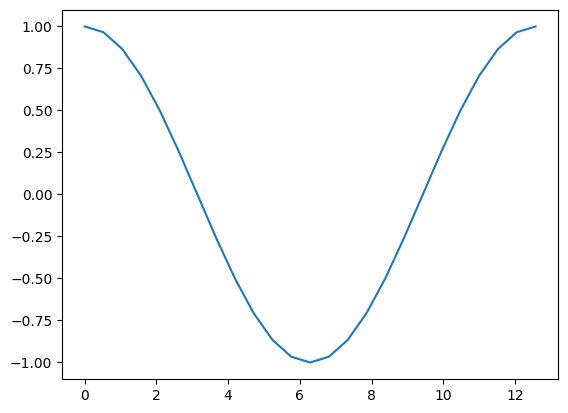

In [22]:
state_vectors = np.array(state_vectors)
plt.plot(angle, state_vectors[:,0])


In [12]:
state_result = qstdata1.analysis_results("state")
print(state_result.value.data)

Operator(qc).data @ np.array([1,0])

[[ 0.49414063+0.j         -0.47265625+0.00097656j]
 [-0.47265625-0.00097656j  0.50585938+0.j        ]]


array([-0.70710678+0.j,  0.70710678+0.j])

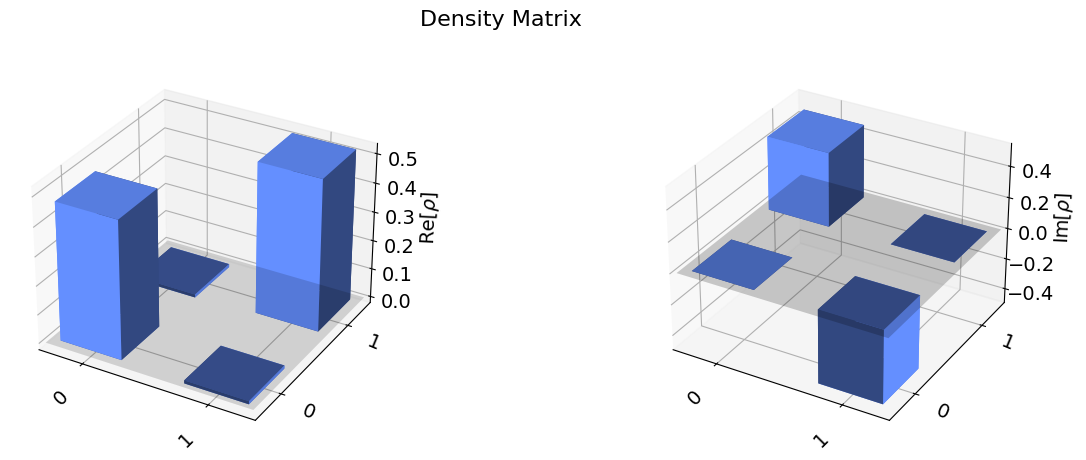

In [17]:
from qiskit.visualization import plot_state_city
plot_state_city(qstdata1.analysis_results("state").value, title='Density Matrix')